# Comparing Maxwell energy and speed distributions

The Maxwell speed distribution is (this is called $\mathcal{D}(v)$ in the Schroeder text):

$$
 \mathcal{P}(v)= \left(\frac{m}{2\pi kT}\right)^{3/2} 4\pi v^2 \, e^{-mv^2/2kT}
$$

while the corresponding kinetic energy distribution is

$$
  \mathcal{P}(E) = \frac{2}{\sqrt{\pi}} \left(\frac{1}{kT}\right)^{3/2} \sqrt{E}\, e^{-E/kT}
$$

Here we'll plot them and compare the shape, maxima, and average values.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def speed_dist(v, kT):
    """Probability distribution for the Maxwell speed distribution"""
    m = 1
    return (m / (2*np.pi*kT))**(3/2) * 4 * np.pi * v**2 * np.exp(-m * v**2 / (2 * kT) )


In [3]:
def energy_dist(E, kT):
    """Probability distribution for the Maxwell energy distribution"""
    return (2 / np.sqrt(np.pi)) * (1/kT**(3/2)) * np.sqrt(E) * np.exp(-E / kT)

In [4]:
v_pts = np.arange(0, 20, 0.01)
E_pts = np.arange(0, 20, 0.01)

kT = 1
v_dist_pts = speed_dist(v_pts, kT)
E_dist_pts = energy_dist(E_pts, kT)


In [5]:
# check normalization
print(np.trapz(v_dist_pts, v_pts))
print(np.trapz(E_dist_pts, E_pts))

0.9999999999999999
0.9997657028043023


In [6]:
# maxima
v_max = v_pts[np.argmax(v_dist_pts)]
print(f'v_max: {v_max:.5f}')

E_max = E_pts[np.argmax(E_dist_pts)]
print(f'E_max: {E_max:.5f}')

v_max: 1.41000
E_max: 0.50000


In [7]:
# averages
v_avg = np.trapz(v_pts * v_dist_pts, v_pts)
E_avg = np.trapz(E_pts * E_dist_pts, E_pts)
print(f'v average: {v_avg:.5f}')
print(f'E average: {E_avg:.5f}')

v average: 1.59577
E average: 1.50000


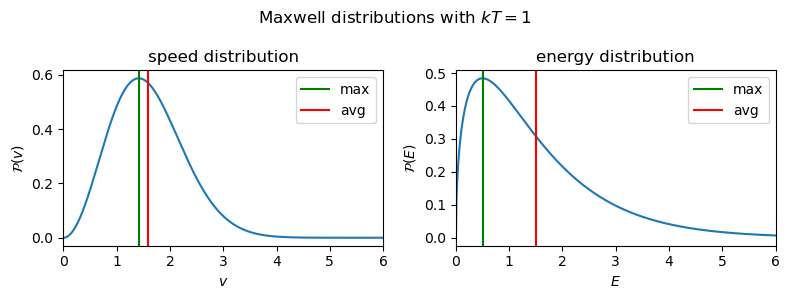

In [8]:

fig = plt.figure(figsize=(8,3))
ax_v = fig.add_subplot(1,2,1)
ax_E = fig.add_subplot(1,2,2)

ax_v.plot(v_pts, speed_dist(v_pts,kT))
ax_E.plot(E_pts, energy_dist(E_pts,kT))

ax_v.set_xlabel('$v$')
ax_v.set_ylabel(r'$\mathcal{P}(v)$')
ax_E.set_xlabel('$E$')
ax_E.set_ylabel(r'$\mathcal{P}(E)$')

ax_v.axvline(v_max, color='green', label='max')
ax_E.axvline(E_max, color='green', label='max')
ax_v.axvline(v_avg, color='red', label='avg')
ax_E.axvline(E_avg, color='red', label='avg')

ax_v.set_xlim(0,6)
ax_E.set_xlim(0,6)

ax_v.set_title('speed distribution')
ax_E.set_title('energy distribution')

ax_v.legend()
ax_E.legend()

fig.suptitle(fr'Maxwell distributions with $kT = {kT}$')

fig.tight_layout()